In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [13]:
def compute_MTF(ROI):
    ROI_SFR = ROI.mean(axis = 0)
    ROI_LSF = np.abs(np.diff(ROI_SFR))

    ROI_MTF = np.abs(np.fft.fft(ROI_LSF))
    ROI_MTF = ROI_MTF[:]/np.max(ROI_MTF)
    ROI_MTF = ROI_MTF[:len(ROI_MTF)//2]

    return ROI_MTF

In [12]:
file_ROI = glob.glob('square/*')

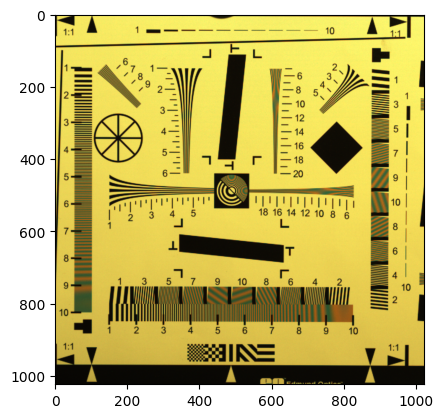

In [6]:
image = plt.imread(file_ROI[0])
plt.imshow(image)
plt.show()

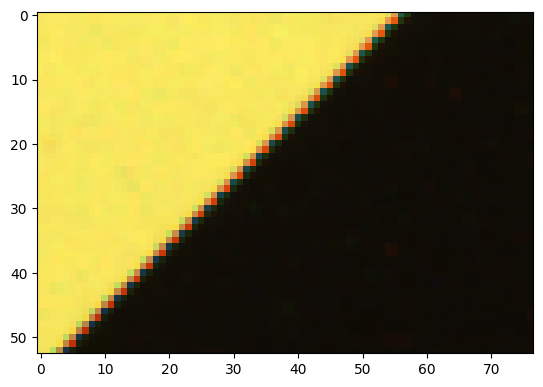

In [22]:
ROI_coords = cv2.selectROI(image)
ROI = image[int(ROI_coords[1]):int(ROI_coords[1] + ROI_coords[3]), int(ROI_coords[0]):int(ROI_coords[0] + ROI_coords[2])]
plt.imshow(ROI)
plt.show()

In [23]:
ROI_R = ROI[:,:,0]
ROI_G = ROI[:,:,1]
ROI_B = ROI[:,:,2]

MTF_R = compute_MTF(ROI_R)
MTF_G = compute_MTF(ROI_G)
MTF_B = compute_MTF(ROI_B)

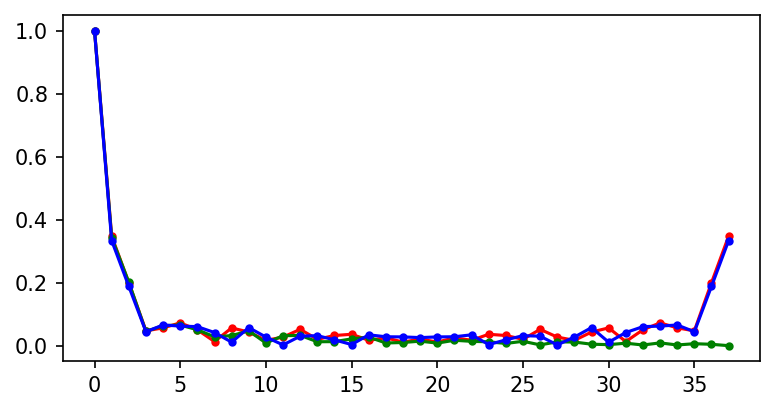

In [27]:
x_MTF = np.arange(0,len(MTF_R))

plt.figure(figsize = (6,3), dpi = 150, facecolor=None)
plt.plot(x_MTF, MTF_R, 'r.-', label = 'Red channel MTF')
plt.plot(x_MTF, MTF_G, 'g.-', label = 'Green channel MTF')
plt.plot(x_MTF, MTF_B, 'b.-', label = 'Blue channel MTF')

plt.show()


In [68]:
#ROI_coords = cv2.selectROI(image)
#ROI = image[int(ROI_coords[1]):int(ROI_coords[1] + ROI_coords[3]), int(ROI_coords[0]):int(ROI_coords[0] + ROI_coords[2])]

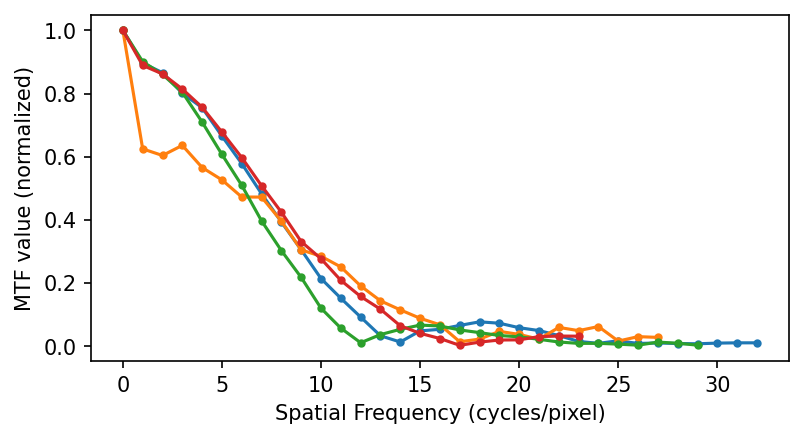

In [71]:
plt.figure(figsize = (6,3), dpi = 150, facecolor=None)
for MTF in MTF_test_data:
    plt.plot([i[0] for i in MTF], [i[1] for i in MTF], '.-')

plt.xlabel('Spatial Frequency (cycles/pixel)')
plt.ylabel('MTF value (normalized)')
#plt.legend(loc = 'upper left')
plt.show()